In [43]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [45]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'location', 'kg', 'mood', 'rm',
       'stable', 'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a',
       '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+',
       '8a'],
      dtype='object')

In [46]:
sessions.head()

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6b+,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a
0,2018-03-25,doripa,1,marathon,bb1,78,0.0,0.95,6a,6b+,...,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60,0.0,0.95,5c,6b+,...,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,78,0.0,0.60,6b,6b+,...,2.0,0.25,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78,0.0,0.50,6b,6b,...,0.0,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60,0.0,0.50,5c,6a+,...,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
scores_translator = {
    '4': 4,
    '5a': 8,
    '5b': 9,
    '5c': 10,
    '6a': 20,
    '6a+': 21,
    '6b': 30,
    '6b+': 40,
    '6c': 45,
    '6c+': 50,
    '7a': 80,
    '7a+': 90,
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [48]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores
sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
0,2018-03-25,doripa,1,marathon,bb1,78,0.0,0.95,6a,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.00
1,2018-03-25,sunshine,1,marathon,bb1,60,0.0,0.95,5c,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.00
2,2018-03-27,doripa,1,technique,bf,78,0.0,0.60,6b,6b+,...,0.25,0.00,0.0,1.5,0.0,0.0,0.0,0.0,0.0,508.25
3,2018-03-29,doripa,1,4x4,bb2,78,0.0,0.50,6b,6b,...,0.00,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.0,430.00
4,2018-03-29,sunshine,1,4x4,bb2,60,0.0,0.50,5c,6a+,...,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.00
5,2018-03-31,doripa,1,project,bf,78,0.0,0.60,6b,6b+,...,0.00,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,619.50
6,2018-02-04,doripa,1,project,bb1,78,0.0,0.40,6b,6c+,...,0.00,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,678.50
7,2018-04-04,doripa,1,project,bf,78,0.0,0.40,6b,6c,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,606.00
8,2018-06-04,doripa,1,arc,bf,78,0.0,0.20,5c,5c,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00
9,2018-06-04,doripa,1,project,bb2,78,0.0,0.50,6b,6c+,...,5.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984.00


In [49]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

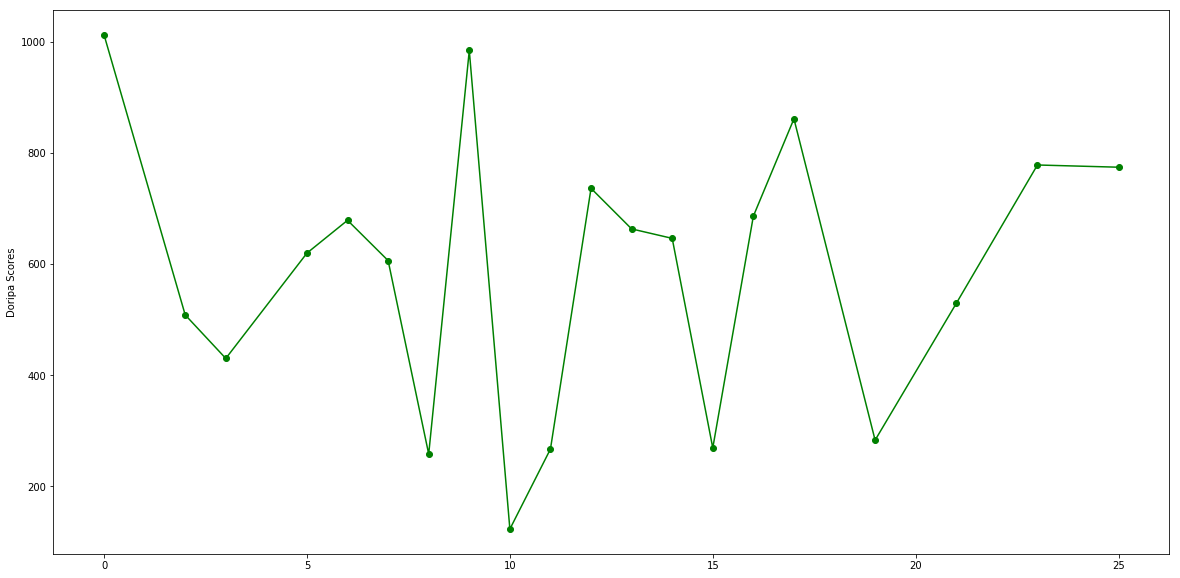

In [50]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.ylabel('Doripa Scores')
plt.show()

In [51]:
sunshine_sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
1,2018-03-25,sunshine,1,marathon,bb1,60,0.0,0.95,5c,6b+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
4,2018-03-29,sunshine,1,4x4,bb2,60,0.0,0.50,5c,6a+,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.0
18,2018-04-28,sunshine,2,base,bb1,59,0.0,0.60,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
20,2018-01-05,sunshine,2,base,bf,59,6.0,0.60,5a,5c,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0
22,2018-03-05,sunshine,2,base,bb2,59,7.0,0.65,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
24,2018-06-05,sunshine,2,base,bb2,59,7.0,0.70,5b,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0


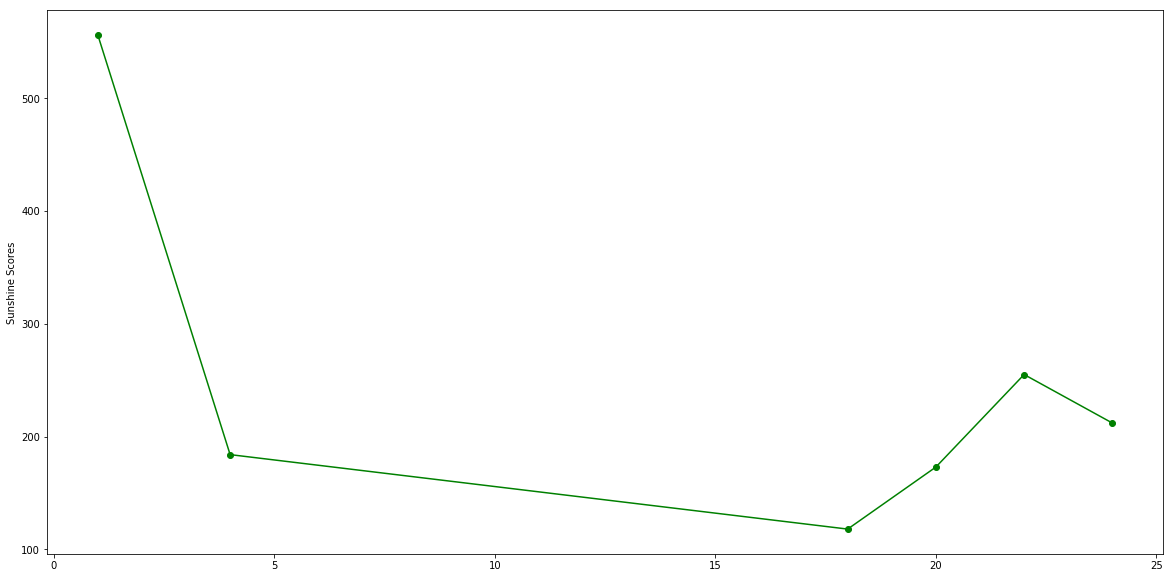

In [64]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions.scores,  marker='o', color='green')
plt.ylabel('Sunshine Scores')
plt.show()

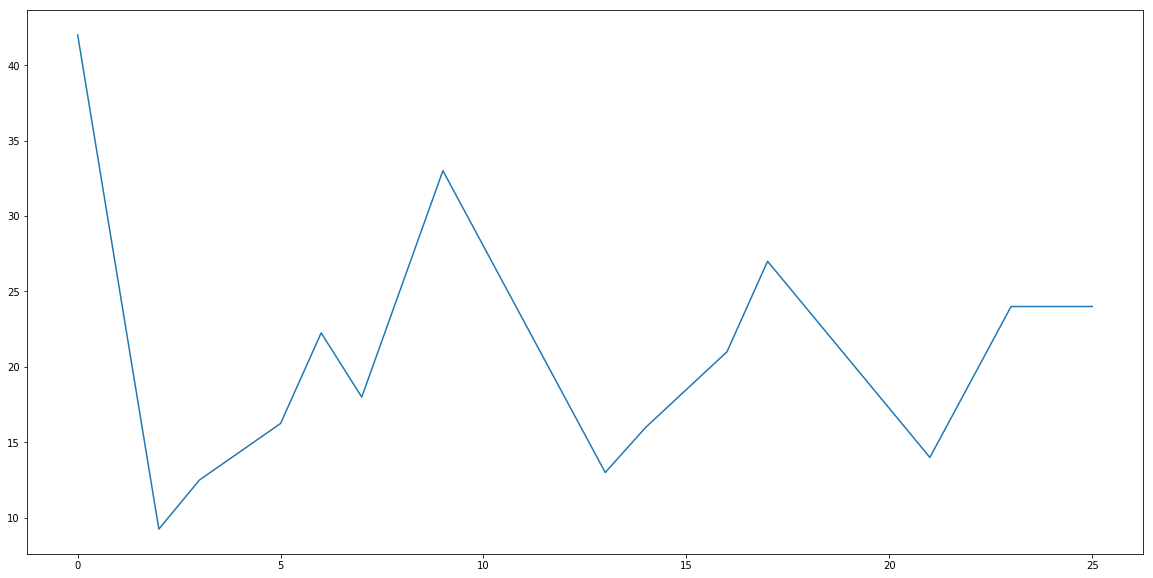

In [53]:
no_arcing = doripa[doripa.phase != 'arc']
plt.figure(figsize=(20,10))
plt.plot(no_arcing['total6'])
plt.show()

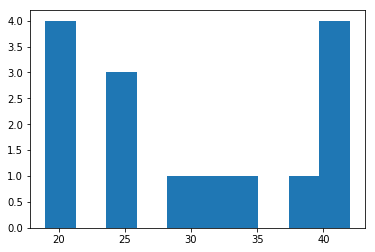

In [54]:
plt.hist(no_arcing['total'])
plt.show()

In [55]:
doripa.corr()

,cycle,kg,mood,rm,total,total6,4,5a,5b,5c,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
cycle,1.000000,-0.350438,0.704409,-0.050092,0.293081,0.168594,0.350438,0.023523,0.075467,0.032386,...,0.115637,-0.114978,-0.235093,-0.012792,NaN,NaN,NaN,NaN,NaN,0.177899
kg,-0.350438,1.000000,-0.663615,-0.241138,-0.342771,-0.169703,-1.000000,-0.228062,0.039670,0.170241,...,-0.013951,0.155415,0.130848,0.094140,NaN,NaN,NaN,NaN,NaN,-0.177268
mood,0.704409,-0.663615,1.000000,0.018740,0.398475,0.116921,0.663615,0.297749,0.101487,0.055996,...,0.028042,-0.312397,-0.183313,-0.041778,NaN,NaN,NaN,NaN,NaN,0.126746
rm,-0.050092,-0.241138,0.018740,1.000000,0.280821,0.715419,0.241138,-0.503709,-0.570327,-0.650881,...,0.292926,0.311921,0.216675,0.176350,NaN,NaN,NaN,NaN,NaN,0.735852
total,0.293081,-0.342771,0.398475,0.280821,1.000000,0.550218,0.342771,0.323725,0.146120,0.169440,...,0.152782,-0.022180,-0.443771,-0.350430,NaN,NaN,NaN,NaN,NaN,0.542988
total6,0.168594,-0.169703,0.116921,0.715419,0.550218,1.000000,0.169703,-0.554748,-0.665763,-0.658865,...,0.415216,0.376557,0.012848,-0.139725,NaN,NaN,NaN,NaN,NaN,0.964533
4,0.350438,-1.000000,0.663615,0.241138,0.342771,0.169703,1.000000,0.228062,-0.039670,-0.170241,...,0.013951,-0.155415,-0.130848,-0.094140,NaN,NaN,NaN,NaN,NaN,0.177268
5a,0.023523,-0.228062,0.297749,-0.503709,0.323725,-0.554748,0.228062,1.000000,0.720725,0.798125,...,-0.247735,-0.471500,-0.480459,-0.125678,NaN,NaN,NaN,NaN,NaN,-0.532862
5b,0.075467,0.039670,0.101487,-0.570327,0.146120,-0.665763,-0.039670,0.720725,1.000000,0.825498,...,-0.377541,-0.301529,-0.445633,-0.121639,NaN,NaN,NaN,NaN,NaN,-0.660157
5c,0.032386,0.170241,0.055996,-0.650881,0.169440,-0.658865,-0.170241,0.798125,0.825498,1.000000,...,-0.292667,-0.402163,-0.319780,-0.321905,NaN,NaN,NaN,NaN,NaN,-0.639967


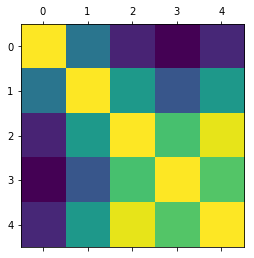

In [56]:
plt.matshow(doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr());

In [57]:
doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr()

,mood,total,total6,rm,scores
mood,1.000000,0.398475,0.116921,0.018740,0.126746
total,0.398475,1.000000,0.550218,0.280821,0.542988
total6,0.116921,0.550218,1.000000,0.715419,0.964533
rm,0.018740,0.280821,0.715419,1.000000,0.735852
scores,0.126746,0.542988,0.964533,0.735852,1.000000


In [58]:
doripa['total'].corr(doripa['total6'])

0.55021786053211297

In [59]:
doripa['total'].corr(doripa['scores'])

0.54298803413493113

In [60]:
doripa['scores'].corr(doripa['rm'])

0.7358516996657446

In [61]:
doripa['scores'].corr(doripa['total6'])

0.96453307564573609

In [62]:
sunshine_sessions.corr()['scores']

cycle    -0.594735
kg        0.594735
mood     -0.238670
rm        0.914816
total     0.946222
total6    0.978791
4        -0.442123
5a        0.840122
5b        0.883018
5c        0.238059
6a        0.949569
6a+       0.751383
6b        0.351734
6b+       0.770191
6c        0.016671
6c+            NaN
7a       -0.205264
7a+            NaN
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64

In [63]:
doripa.corr()['scores']

cycle     0.177899
kg       -0.177268
mood      0.126746
rm        0.735852
total     0.542988
total6    0.964533
4         0.177268
5a       -0.532862
5b       -0.660157
5c       -0.639967
6a        0.829868
6a+       0.808532
6b        0.715384
6b+       0.688880
6c        0.481257
6c+       0.437648
7a        0.148039
7a+      -0.045717
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64